# Comparison of Audio Features between Popular Music on Tik Tok and U.S. Charts, 2018 & 2020

### A. Preparing and creating the data sets

#### Import necessary libraries and gain access to Spotify's Web API

In [89]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

client_id = '4444967404d947e984576bbef4297120'
client_secret = '55501b477e154db28490aa2db3309303'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

#### Get playlists to grab data from

In [2]:
user = 'tiffany.zheng'
tiktok_2020 = '65LdqYCLcsV0lJoxpeQ6fW'
top_2020 = '0slV5JuQ6xyx4okDs02p2k'

#### Writing functions to grab all the IDs of songs within a playlist

In [3]:
def get_playlist_tracks(username, playlist_id):
    tracks_list= []
    results = sp.user_playlist(username, playlist_id,
    fields="tracks,next")
    tracks = results['tracks']
    while tracks:
        tracks_list += [ item['track'] for (i, item) in
        enumerate(tracks['items']) ]
        tracks = sp.next(tracks)
    return tracks_list

def get_playlist_URIs(username, playlist_id):
    return [t["uri"] for t in get_playlist_tracks(username, playlist_id)]

#### Generate list of track IDs for each playlist

In [5]:
tiktok_2020_ids = get_playlist_URIs(user, tiktok_2020)
top_2020_ids = get_playlist_URIs(user, top_2020)

#### Function to grab audio features and create dataframe for given tracks

In [6]:
#get the audio features
#split function is because spotipy functions only take up to 50 songs
def split_URIs(track_URIs, n):
    return_lst = [track_URIs[i:i+n] for i in range(0, len(track_URIs), n)]
    return return_lst

def get_audio_features(track_URIs) :
    features = []
    r = split_URIs(track_URIs,50)
    for pack in range(len(r)):
        features = features + (sp.audio_features(r[pack]))
    df = pd.DataFrame.from_dict(features)
    df["uri"] = track_URIs
    return df

#### Create pandas data frame, generate csv data files

In [7]:
tiktok_2020_df = get_audio_features(tiktok_2020_ids)
tiktok_2020_df.to_csv("tiktok_2020.csv", sep = ',')

top_2020_df = get_audio_features(top_2020_ids)
top_2020_df.to_csv("top_2020.csv", sep = ',')

### B. Begin Data Visualization! 

#### Main question: Has the correlation between Tik Tok songs and Chart topping songs changed between 2018 and 2020?

#### Read in columns needed for histograms

In [84]:
tiktok_2020_danceability = tiktok_2020_df['danceability']
top_2020_danceability = top_2020_df['danceability']

tiktok_2020_energy = tiktok_2020_df['energy']
top_2020_energy = top_2020_df['energy']

tiktok_2020_loudness = tiktok_2020_df['loudness']
top_2020_loudness = top_2020_df['loudness']

tiktok_2020_speechiness = tiktok_2020_df['speechiness']
top_2020_speechiness = top_2020_df['speechiness']

tiktok_2020_acousticness = tiktok_2020_df['acousticness']
top_2020_acousticness = top_2020_df['acousticness']

tiktok_2020_instrumentalness = tiktok_2020_df['instrumentalness']
top_2020_instrumentalness = top_2020_df['instrumentalness']

tiktok_2020_liveness = tiktok_2020_df['liveness']
top_2020_liveness = top_2020_df['liveness']

tiktok_2020_valence = tiktok_2020_df['valence']
top_2020_valence = top_2020_df['valence']

tiktok_2020_tempo = tiktok_2020_df['tempo']
top_2020_tempo = top_2020_df['tempo']

tiktok_2020_length = tiktok_2020_df['duration_ms']
top_2020_length = top_2020_df['duration_ms']

tiktok_2020_time_signature = tiktok_2020_df['time_signature']
top_2020_time_signature = top_2020_df['time_signature']

#### Making histograms: Comparison of Audio Feature Distributions for Tik Tok Songs vs Chart Topping Songs in 2020

<ipython-input-47-30bf29792756>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(3,3,1)
<ipython-input-47-30bf29792756>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax5 = fig2.add_subplot(3,3,2)
<ipython-input-47-30bf29792756>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will al

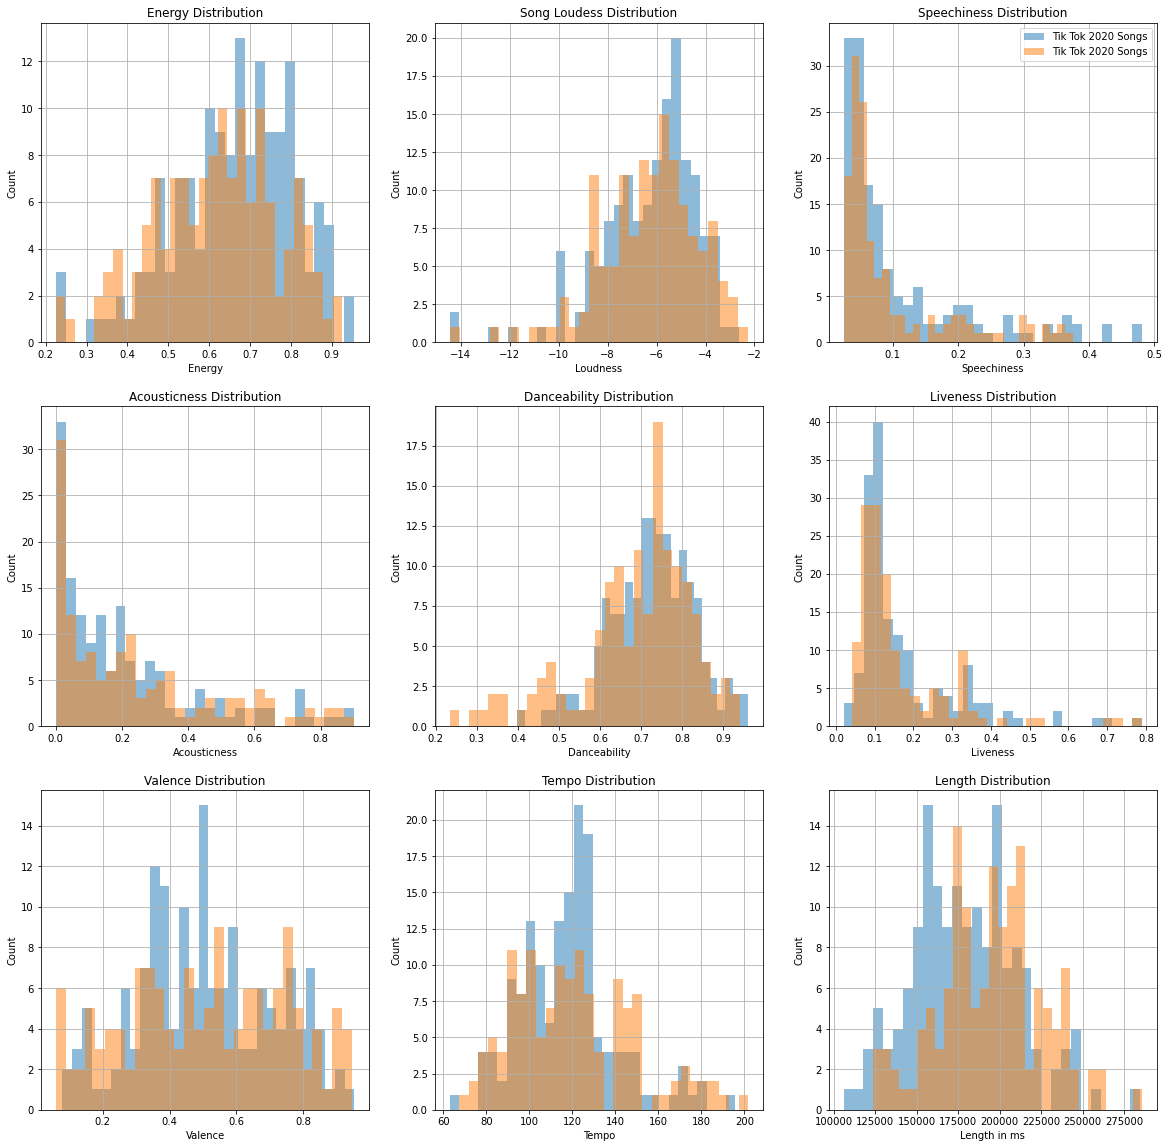

In [47]:
"""
Notes: Dropped columns for instrumentalness and time signature after running once, found no meaningful data/variation to graph.
Legend for all 9 plots are located in top right of entire figure.
"""
fig2 = plt.figure(figsize=(20,20))

#energy
ax3= fig2.add_subplot(3,3,1)
ax3.set_xlabel("Energy")
ax3.set_ylabel("Count")
ax3.set_title("Energy Distribution")
tiktok_2020_energy.hist(alpha=0.5,bins = 30)
ax4 = fig2.add_subplot(3,3,1)
top_2020_energy.hist(alpha=0.5,bins = 30)

#loudness
ax4= fig2.add_subplot(3,3,2)
ax4.set_xlabel("Loudness")
ax4.set_ylabel("Count")
ax4.set_title("Song Loudess Distribution")
tiktok_2020_loudness.hist(alpha=0.5,bins = 30)
ax5 = fig2.add_subplot(3,3,2)
top_2020_loudness.hist(alpha=0.5,bins = 30)

#speechiness
ax6= fig2.add_subplot(3,3,3)
ax6.set_xlabel("Speechiness")
ax6.set_ylabel("Count")
ax6.set_title("Speechiness Distribution")
tiktok_2020_speechiness.hist(alpha=0.5,bins = 30, label='Tik Tok 2020 Songs')
ax7 = fig2.add_subplot(3,3,3)
top_2020_speechiness.hist(alpha=0.5,bins = 30, label='Tik Tok 2020 Songs')
plt.legend(loc="upper right")

#acousticness
ax8= fig2.add_subplot(3,3,4)
ax8.set_xlabel("Acousticness")
ax8.set_ylabel("Count")
ax8.set_title("Acousticness Distribution")
tiktok_2020_acousticness.hist(alpha=0.5,bins = 30)
ax9 = fig2.add_subplot(3,3,4)
top_2020_acousticness.hist(alpha=0.5,bins = 30)

#danceability
ax20= fig2.add_subplot(3,3,5)
ax20.set_xlabel("Danceability")
ax20.set_ylabel("Count")
ax20.set_title("Danceability Distribution")
tiktok_2020_danceability.hist(alpha=0.5,bins = 30)
ax21= fig2.add_subplot(3,3,5)
top_2020_danceability.hist(alpha=0.5,bins = 30)

#liveness
ax12= fig2.add_subplot(3,3,6)
ax12.set_xlabel("Liveness")
ax12.set_ylabel("Count")
ax12.set_title("Liveness Distribution")
tiktok_2020_liveness.hist(alpha=0.5,bins = 30)
ax13= fig2.add_subplot(3,3,6)
top_2020_liveness.hist(alpha=0.5,bins = 30)

#valence
ax14= fig2.add_subplot(3,3,7)
ax14.set_xlabel("Valence")
ax14.set_ylabel("Count")
ax14.set_title("Valence Distribution")
tiktok_2020_valence.hist(alpha=0.5,bins = 30)
ax15= fig2.add_subplot(3,3,7)
top_2020_valence.hist(alpha=0.5,bins = 30)

#tempo
ax16= fig2.add_subplot(3,3,8)
ax16.set_xlabel("Tempo")
ax16.set_ylabel("Count")
ax16.set_title("Tempo Distribution")
tiktok_2020_tempo.hist(alpha=0.5,bins = 30)
ax17= fig2.add_subplot(3,3,8)
top_2020_tempo.hist(alpha=0.5,bins = 30)

#length
ax18= fig2.add_subplot(3,3,9)
ax18.set_xlabel("Length in ms")
ax18.set_ylabel("Count")
ax18.set_title("Length Distribution")
tiktok_2020_length.hist(alpha=0.5,bins = 30)
ax19= fig2.add_subplot(3,3,9)
top_2020_length.hist(alpha=0.5,bins = 30)

### Repeat process for 2018 data

In [35]:
#generate data and dataframes 
tiktok_2018 = '73Q2uot60f3KH9N3YolDfV'
top_2018 = '5yj18sgTwGz6gmc18wIEqc'

tiktok_2018_ids = get_playlist_URIs(user, tiktok_2018)
top_2018_ids = get_playlist_URIs(user, top_2018)

tiktok_2018_df = get_audio_features(tiktok_2018_ids)
tiktok_2018_df.to_csv("tiktok_2018.csv", sep = ',')

top_2018_df = get_audio_features(top_2018_ids)
top_2018_df.to_csv("top_2018.csv", sep = ',')

In [37]:
#save column data for visualization
tiktok_2018_danceability = tiktok_2018_df['danceability']
top_2018_danceability = top_2018_df['danceability']

tiktok_2018_energy = tiktok_2018_df['energy']
top_2018_energy = top_2018_df['energy']

tiktok_2018_loudness = tiktok_2018_df['loudness']
top_2018_loudness = top_2018_df['loudness']

tiktok_2018_speechiness = tiktok_2018_df['speechiness']
top_2018_speechiness = top_2018_df['speechiness']

tiktok_2018_acousticness = tiktok_2018_df['acousticness']
top_2018_acousticness = top_2018_df['acousticness']

tiktok_2018_instrumentalness = tiktok_2018_df['instrumentalness']
top_2018_instrumentalness = top_2018_df['instrumentalness']

tiktok_2018_liveness = tiktok_2018_df['liveness']
top_2018_liveness = top_2018_df['liveness']

tiktok_2018_valence = tiktok_2018_df['valence']
top_2018_valence = top_2018_df['valence']

tiktok_2018_tempo = tiktok_2018_df['tempo']
top_2018_tempo = top_2018_df['tempo']

tiktok_2018_length = tiktok_2018_df['duration_ms']
top_2018_length = top_2018_df['duration_ms']

tiktok_2018_time_signature = tiktok_2018_df['time_signature']
top_2018_time_signature = top_2018_df['time_signature']

#### Making histograms: Comparison of Audio Feature Distributions for Tik Tok Songs vs Chart Topping Songs in 2018

<ipython-input-46-b311a66acc10>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = fig2.add_subplot(3,3,1)
<ipython-input-46-b311a66acc10>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax5 = fig2.add_subplot(3,3,2)
<ipython-input-46-b311a66acc10>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will al

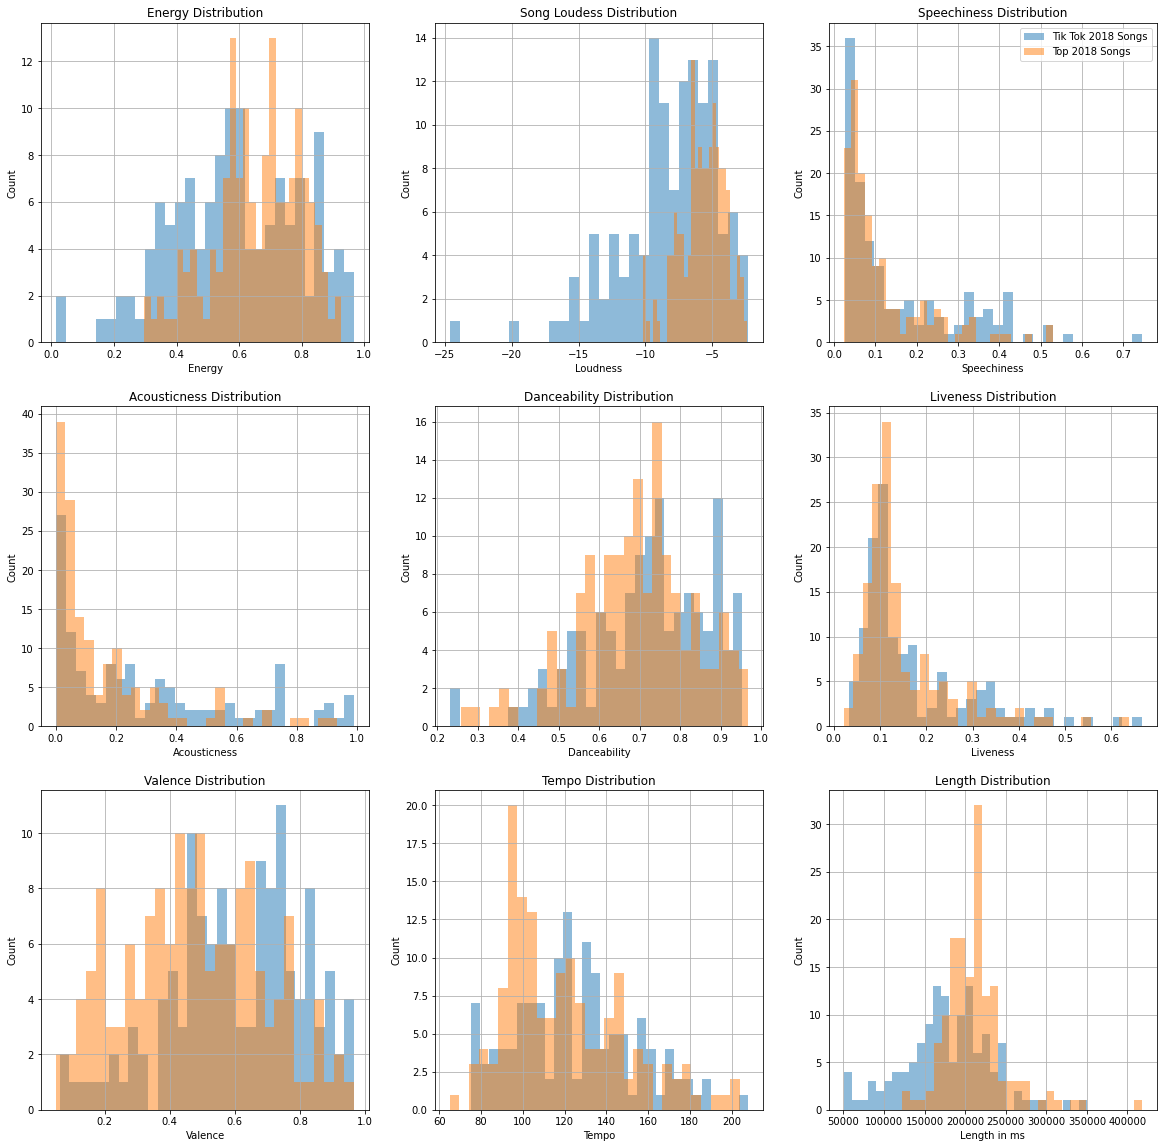

In [46]:
#visualize histograms for audio features
fig2 = plt.figure(figsize=(20,20))

#energy
ax3= fig2.add_subplot(3,3,1)
ax3.set_xlabel("Energy")
ax3.set_ylabel("Count")
ax3.set_title("Energy Distribution")
tiktok_2018_energy.hist(alpha=0.5,bins = 30)
ax4 = fig2.add_subplot(3,3,1)
top_2018_energy.hist(alpha=0.5,bins = 30)

#loudness
ax4= fig2.add_subplot(3,3,2)
ax4.set_xlabel("Loudness")
ax4.set_ylabel("Count")
ax4.set_title("Song Loudess Distribution")
tiktok_2018_loudness.hist(alpha=0.5,bins = 30)
ax5 = fig2.add_subplot(3,3,2)
top_2018_loudness.hist(alpha=0.5,bins = 30)

#speechiness
ax6= fig2.add_subplot(3,3,3)
ax6.set_xlabel("Speechiness")
ax6.set_ylabel("Count")
ax6.set_title("Speechiness Distribution")
tiktok_2018_speechiness.hist(alpha=0.5,bins = 30, label='Tik Tok 2018 Songs')
ax7 = fig2.add_subplot(3,3,3)
top_2018_speechiness.hist(alpha=0.5,bins = 30, label='Top 2018 Songs')
plt.legend(loc="upper right")

#acousticness
ax8= fig2.add_subplot(3,3,4)
ax8.set_xlabel("Acousticness")
ax8.set_ylabel("Count")
ax8.set_title("Acousticness Distribution")
tiktok_2018_acousticness.hist(alpha=0.5,bins = 30)
ax9 = fig2.add_subplot(3,3,4)
top_2018_acousticness.hist(alpha=0.5,bins = 30)

#danceability
ax20= fig2.add_subplot(3,3,5)
ax20.set_xlabel("Danceability")
ax20.set_ylabel("Count")
ax20.set_title("Danceability Distribution")
tiktok_2018_danceability.hist(alpha=0.5,bins = 30)
ax21= fig2.add_subplot(3,3,5)
top_2018_danceability.hist(alpha=0.5,bins = 30)

#liveness
ax12= fig2.add_subplot(3,3,6)
ax12.set_xlabel("Liveness")
ax12.set_ylabel("Count")
ax12.set_title("Liveness Distribution")
tiktok_2018_liveness.hist(alpha=0.5,bins = 30)
ax13= fig2.add_subplot(3,3,6)
top_2018_liveness.hist(alpha=0.5,bins = 30)

#valence
ax14= fig2.add_subplot(3,3,7)
ax14.set_xlabel("Valence")
ax14.set_ylabel("Count")
ax14.set_title("Valence Distribution")
tiktok_2018_valence.hist(alpha=0.5,bins = 30)
ax15= fig2.add_subplot(3,3,7)
top_2018_valence.hist(alpha=0.5,bins = 30)

#tempo
ax16= fig2.add_subplot(3,3,8)
ax16.set_xlabel("Tempo")
ax16.set_ylabel("Count")
ax16.set_title("Tempo Distribution")
tiktok_2018_tempo.hist(alpha=0.5,bins = 30)
ax17= fig2.add_subplot(3,3,8)
top_2018_tempo.hist(alpha=0.5,bins = 30)

#length
ax18= fig2.add_subplot(3,3,9)
ax18.set_xlabel("Length in ms")
ax18.set_ylabel("Count")
ax18.set_title("Length Distribution")
tiktok_2018_length.hist(alpha=0.5,bins = 30)
ax19= fig2.add_subplot(3,3,9)
top_2018_length.hist(alpha=0.5,bins = 30)

### C. Exploratory Data Analysis: Interpreting differences in audio features between the years

In [39]:
tiktok_2018_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.721641,0.587447,4.960938,-8.244414,0.664062,0.158413,0.301790,0.070351,0.174552,0.606054,125.039414,178210.601562,3.937500
std,0.150757,0.207310,3.375228,3.677535,0.474173,0.147771,0.293433,0.196040,0.126949,0.206275,28.710909,54131.961617,0.273502
min,0.231000,0.014500,0.000000,-24.639000,0.000000,0.025800,0.000192,0.000000,0.033000,0.061600,74.960000,50274.000000,3.000000
25%,0.621750,0.438750,1.000000,-9.710250,0.000000,0.047600,0.040950,0.000000,0.094450,0.474000,103.985750,147082.250000,4.000000
50%,0.737500,0.581000,5.000000,-7.518500,1.000000,0.086150,0.213500,0.000025,0.118000,0.611000,121.028500,177306.000000,4.000000
75%,0.843500,0.749500,8.000000,-5.689500,1.000000,0.237250,0.484500,0.005050,0.227250,0.751500,143.785000,210572.750000,4.000000
max,0.954000,0.968000,11.000000,-2.312000,1.000000,0.745000,0.991000,0.910000,0.666000,0.967000,207.970000,350219.000000,5.000000


In [40]:
top_2018_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.692503,0.656745,5.838926,-5.749315,0.563758,0.116681,0.154812,0.001176,0.149586,0.475657,119.346966,212018.395973,3.986577
std,0.139563,0.140233,3.674358,1.683511,0.497591,0.104161,0.192924,0.010512,0.099469,0.211662,28.655663,38845.496301,0.163846
min,0.258000,0.296000,0.000000,-10.212000,0.000000,0.023200,0.000813,0.000000,0.021500,0.049900,64.934000,121887.000000,3.000000
25%,0.600000,0.579000,2.000000,-6.624000,0.000000,0.047100,0.030500,0.000000,0.091300,0.330000,97.040000,189973.000000,4.000000
50%,0.699000,0.672000,6.000000,-5.628000,1.000000,0.074700,0.076200,0.000000,0.112000,0.473000,113.021000,210773.000000,4.000000
75%,0.774000,0.764000,9.000000,-4.564000,1.000000,0.138000,0.204000,0.000011,0.170000,0.631000,137.996000,225600.000000,4.000000
max,0.968000,0.927000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.127000,0.637000,0.966000,203.911000,417920.000000,5.000000


#### How has the correlation between Tik Tok songs and Chart topping songs changed between 2018 and 2020?
#### Take the average difference between popular Tik Tok songs and generally popular songs in 2018 for each audio feature to examine changes in correlation

In [79]:
#get differences in means in 2018 - absolute value, because we are only interested in the difference
dance_mean_diff_18 = abs(0.721641 - 0.692503)
energy_mean_diff_18 = abs(0.587447 - 0.656745)
key_mean_diff_18 = abs(4.960938 - 5.838926)
loud_mean_diff_18 = abs(-8.244414 - (-5.749315))
mode_mean_diff_18 = abs(0.664062 - 0.563758)
speech_mean_diff_18 = abs(0.158413 - 0.116681)
acoustic_mean_diff_18 = abs(0.301790 - 0.154812)
instrument_mean_diff_18 = abs(0.070351 - 0.001176)
liveness_mean_diff_18 = abs(0.174552 - 0.149586)
valence_mean_diff_18 = abs(0.606054 - 0.475657)
tempo_mean_diff_18 = abs(125.039414 - 119.346966)
length_mean_diff_18 = abs((178210.601562 - 212018.395973)/60000)
timesig_mean_diff_18 = abs(3.937500 - 3.986577)

In [41]:
tiktok_2020_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.727385,0.662558,5.884615,-6.341827,0.519231,0.110110,0.206199,0.026782,0.173507,0.508535,117.722314,179335.557692,4.000000
std,0.102258,0.147296,3.601006,2.022790,0.501239,0.103397,0.215072,0.126922,0.132148,0.201620,22.258810,32010.304550,0.300537
min,0.399000,0.225000,0.000000,-14.454000,0.000000,0.024800,0.000131,0.000000,0.020000,0.078700,62.948000,106031.000000,1.000000
25%,0.665750,0.572500,3.000000,-7.523500,0.000000,0.043725,0.037325,0.000000,0.094750,0.360750,101.717750,157332.750000,4.000000
50%,0.731000,0.679500,6.000000,-5.887500,1.000000,0.064700,0.132500,0.000002,0.119000,0.496000,119.466500,177836.000000,4.000000
75%,0.799750,0.775250,9.000000,-4.979750,1.000000,0.133500,0.289500,0.000096,0.194250,0.666750,125.969500,199172.750000,4.000000
max,0.961000,0.955000,11.000000,-2.634000,1.000000,0.481000,0.902000,0.915000,0.790000,0.954000,195.779000,284480.000000,5.000000


In [42]:
top_2020_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,0.687647,0.618237,4.935252,-6.321986,0.546763,0.097703,0.246216,0.006945,0.163744,0.510809,120.501180,195103.165468,3.956835
std,0.140862,0.150494,3.677603,2.049805,0.499609,0.087086,0.241854,0.057305,0.128949,0.239836,28.344957,31257.851478,0.203964
min,0.234000,0.225000,0.000000,-14.454000,0.000000,0.025300,0.001150,0.000000,0.041100,0.059200,67.196000,123429.000000,3.000000
25%,0.625500,0.515000,1.000000,-7.413500,0.000000,0.042250,0.040250,0.000000,0.088850,0.327000,98.542000,173236.500000,4.000000
50%,0.719000,0.627000,5.000000,-6.130000,1.000000,0.058100,0.189000,0.000000,0.116000,0.518000,116.971000,195429.000000,4.000000
75%,0.781000,0.722000,8.000000,-4.987500,1.000000,0.106000,0.358500,0.000018,0.188500,0.715000,139.980000,213558.500000,4.000000
max,0.941000,0.924000,11.000000,-2.259000,1.000000,0.375000,0.902000,0.657000,0.790000,0.947000,201.739000,285634.000000,4.000000


#### Repeat for 2020 data

In [80]:
dance_mean_diff_20 = abs(0.727385 - 0.687647)
energy_mean_diff_20 = abs(0.662558 - 0.618237)
key_mean_diff_20 = abs(5.884615 - 4.935252)
loud_mean_diff_20 = abs(-6.341827 - (-6.321986))
mode_mean_diff_20 = abs(0.519231 - 0.546763)
speech_mean_diff_20 = abs(0.110110 - 0.097703)
acoustic_mean_diff_20 = abs(0.206199 - 0.246216)
instrument_mean_diff_20 = abs(0.026782 - 0.006945)
liveness_mean_diff_20 = abs(0.173507 - 0.163744)
valence_mean_diff_20 = abs(0.508535 - 0.510809)
tempo_mean_diff_20 = abs(125.039414 - 119.346966)
length_mean_diff_20 = abs((179335.557692 - 195103.165468)/60000)
timesig_mean_diff_20 = abs(4.000000 - 3.956835)

#### Bar plots to visualize differences between playlists in 2020 vs differences in playlists in 2018

Text(0.5, 1.0, 'Comparing average differences of TikTok Songs and Top Chart Songs in 2018 and 2020 Part A')

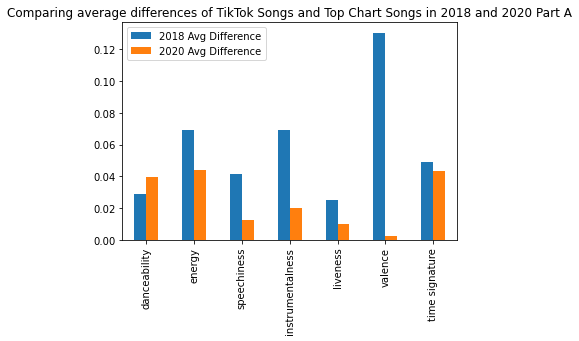

In [86]:
# separated into 2 bar charts for better visualization (smaller values put in bar chart A, larger in B)
diffs_20_a = [dance_mean_diff_20, energy_mean_diff_20, 
             speech_mean_diff_20,instrument_mean_diff_20,liveness_mean_diff_20,
            valence_mean_diff_20,timesig_mean_diff_20]
diffs_18_a = [dance_mean_diff_18, energy_mean_diff_18, 
             speech_mean_diff_18,instrument_mean_diff_18,liveness_mean_diff_18,
            valence_mean_diff_18,timesig_mean_diff_18]
index = ['danceability', 'energy', 'speechiness',
        'instrumentalness','liveness','valence','time signature']
means_df = pd.DataFrame({'2018 Avg Difference': diffs_18_a,
                   '2020 Avg Difference': diffs_20_a}, index=index)
ax = means_df.plot.bar(rot=0)
plt.xticks(range(len(index)), index, rotation=90)
plt.title("Comparing average differences of TikTok Songs and Top Chart Songs in 2018 and 2020 Part A")

Text(0.5, 1.0, 'Comparing average differences of TikTok Songs and Top Chart Songs in 2018 and 2020 Part B')

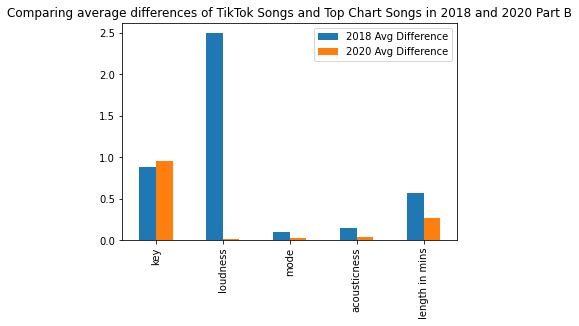

In [90]:
diffs_20_b = [key_mean_diff_20, loud_mean_diff_20, mode_mean_diff_20, 
             acoustic_mean_diff_20, length_mean_diff_20]
diffs_18_b = [key_mean_diff_18, loud_mean_diff_18, mode_mean_diff_18, 
             acoustic_mean_diff_18, length_mean_diff_18]
index1 = ['key', 'loudness', 'mode',
        'acousticness', 'length in mins']
means1_df = pd.DataFrame({'2018 Avg Difference': diffs_18_b,
                   '2020 Avg Difference': diffs_20_b}, index=index1)
ax = means1_df.plot.bar(rot=0)
plt.xticks(range(len(index1)), index1, rotation=90)
plt.title("Comparing average differences of TikTok Songs and Top Chart Songs in 2018 and 2020 Part B")